In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading the dataset
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
#Let's check the samples of the data ( Transposed)
display('Train  samples:',train.head())


'Train  samples:'

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [4]:
print('the data size is', train.shape)

the data size is (12906, 83)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

A lot of missing columns such as patient_race, metastatic_first_novel_treatment   
Columns like Ozone, PM25, N02 represent environmental indicators, metastatic_first_novel_treatment_type
Tareget variable: DiagPeriodL90D

In [6]:
train.describe().T.style.background_gradient().format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [7]:
train.patient_zip3

0        924
1        928
2        760
3        926
4        836
        ... 
12901    436
12902    945
12903    926
12904    112
12905    336
Name: patient_zip3, Length: 12906, dtype: int64

In [8]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [9]:
print(' Total duplicates in the data are:', train.duplicated().sum())

 Total duplicates in the data are: 0


In [10]:
#- Below are the columns & corresponding missing values
train = train.applymap(lambda x: np.nan if x == 'nan' else x)

In [11]:
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 43292,which is 4.04% of total data.


In [12]:
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    if missing_percentage > 3:
        print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.


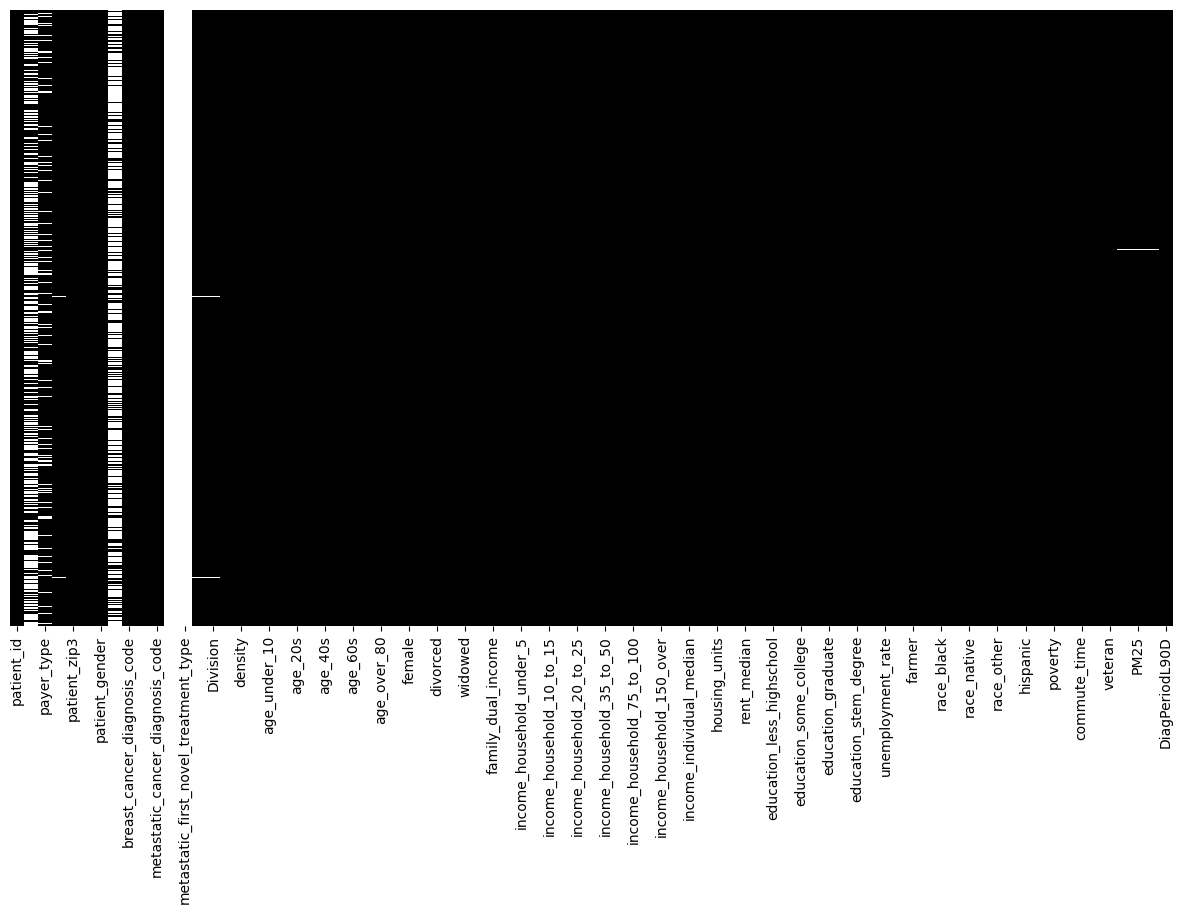

In [13]:
plt.figure(figsize=(15, 8))
plt.rcParams['axes.facecolor'] = 'black'
cmap = sns.color_palette(['black', 'white'])
sns.heatmap(train.isnull(), cbar=False, cmap=cmap,
            yticklabels=False, vmin=0, vmax=1, cbar_kws={'color': 'white'})
plt.show()

In [14]:
from tabulate import tabulate
cat_columns = train.select_dtypes(include=['object'])

for column in cat_columns:
    print(f"Value counts for column '{column}':")
    value_counts = train[column].value_counts().head(10)
    total_count = len(train[column])
    data = []
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        data.append([value, count, f"{percentage:.2f}%"])
    headers = ["Value", "Count", "Percentage"]
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print('=' * 50)

Value counts for column 'patient_race':
+----------+-------+------------+
|  Value   | Count | Percentage |
+----------+-------+------------+
|  White   | 3588  |   27.80%   |
|  Black   | 1056  |   8.18%    |
| Hispanic |  829  |   6.42%    |
|  Other   |  683  |   5.29%    |
|  Asian   |  365  |   2.83%    |
+----------+-------+------------+
Value counts for column 'payer_type':
+--------------------+-------+------------+
|       Value        | Count | Percentage |
+--------------------+-------+------------+
|     COMMERCIAL     | 6032  |   46.74%   |
|      MEDICAID      | 2569  |   19.91%   |
| MEDICARE ADVANTAGE | 2502  |   19.39%   |
+--------------------+-------+------------+
Value counts for column 'patient_state':
+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|  CA   | 2438  |   18.89%   |
|  TX   | 1155  |   8.95%    |
|  NY   | 1041  |   8.07%    |
|  MI   |  858  |   6.65%    |
|  IL   |  782  |   6.06%    |
|  OH   |  754  |  

In [15]:
train[column].value_counts().head(10)

Division
East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: count, dtype: int64

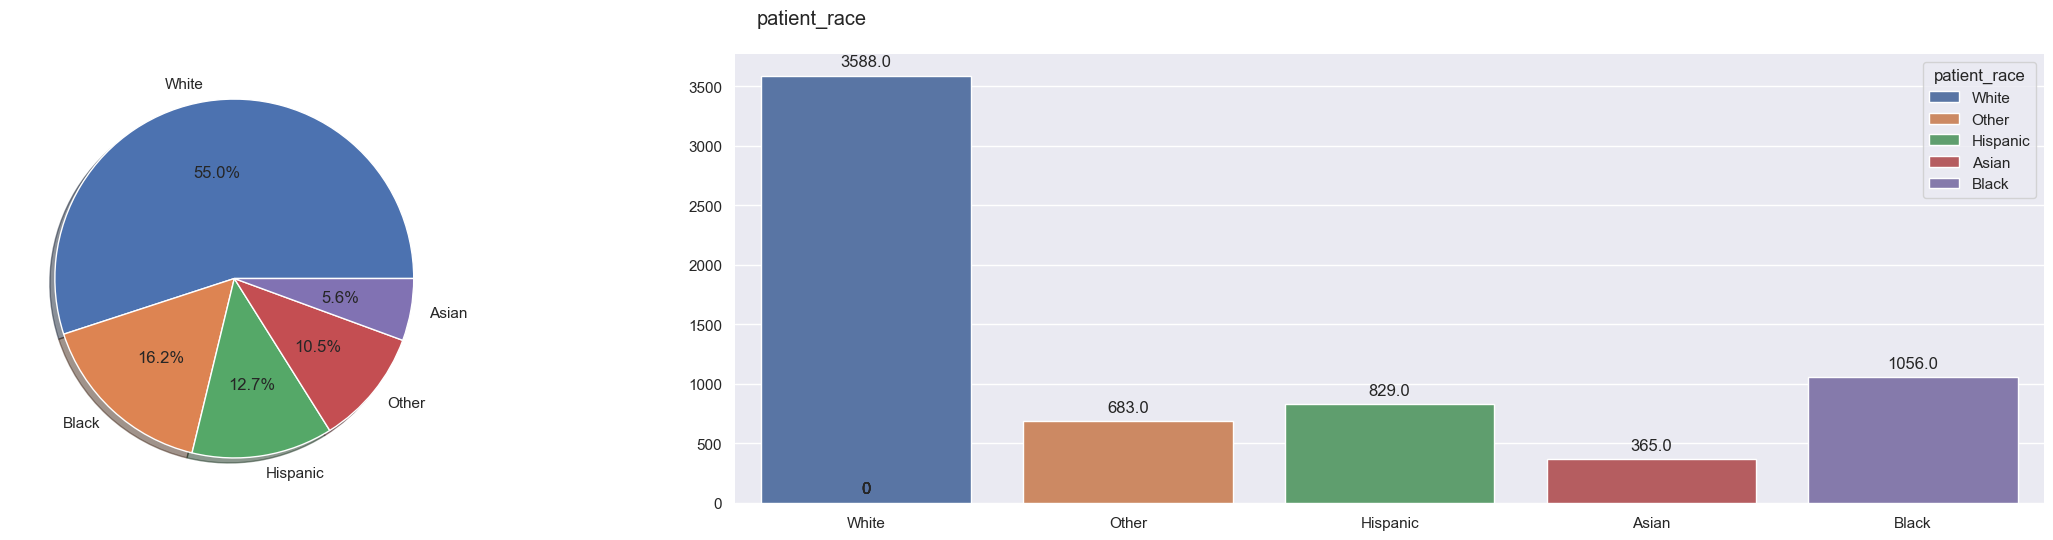

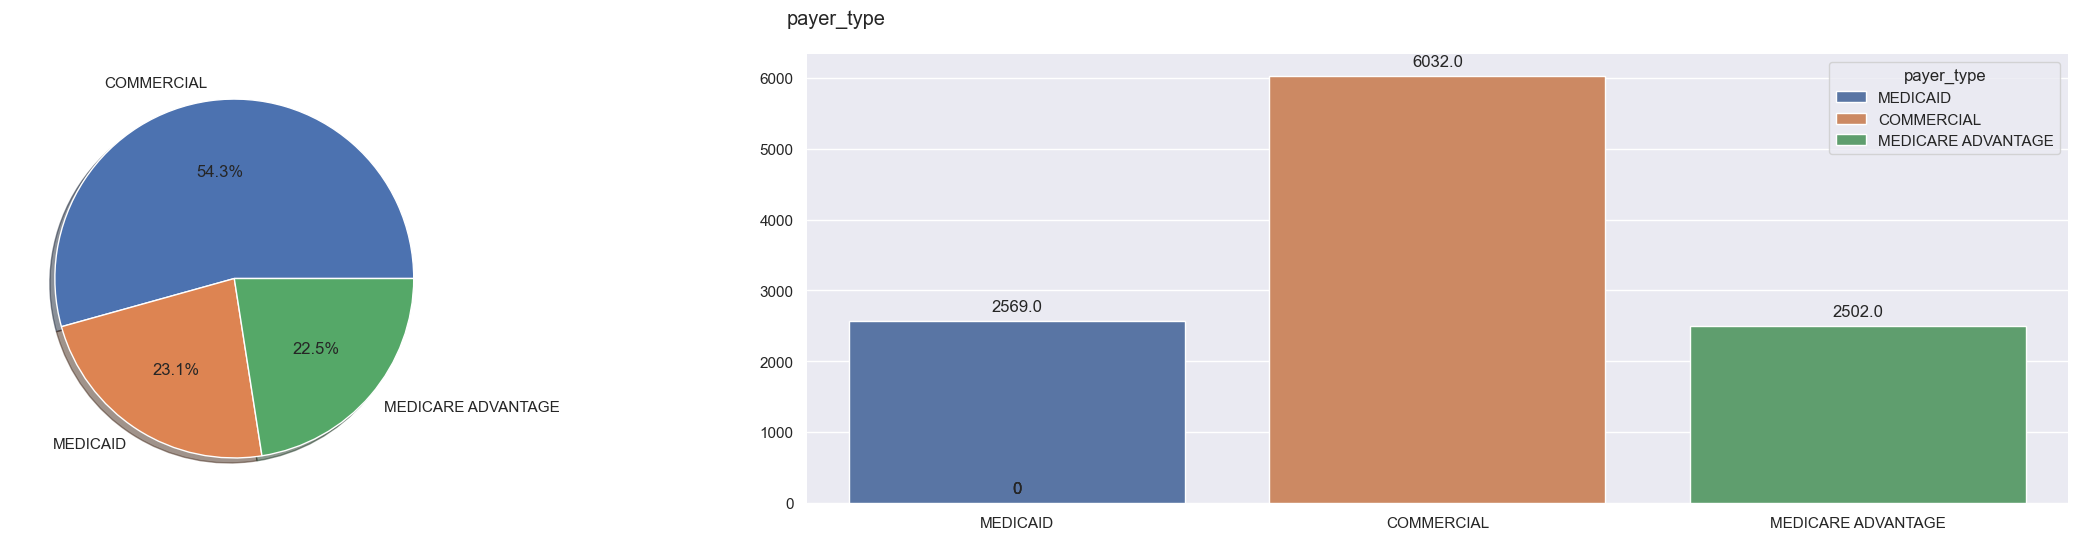

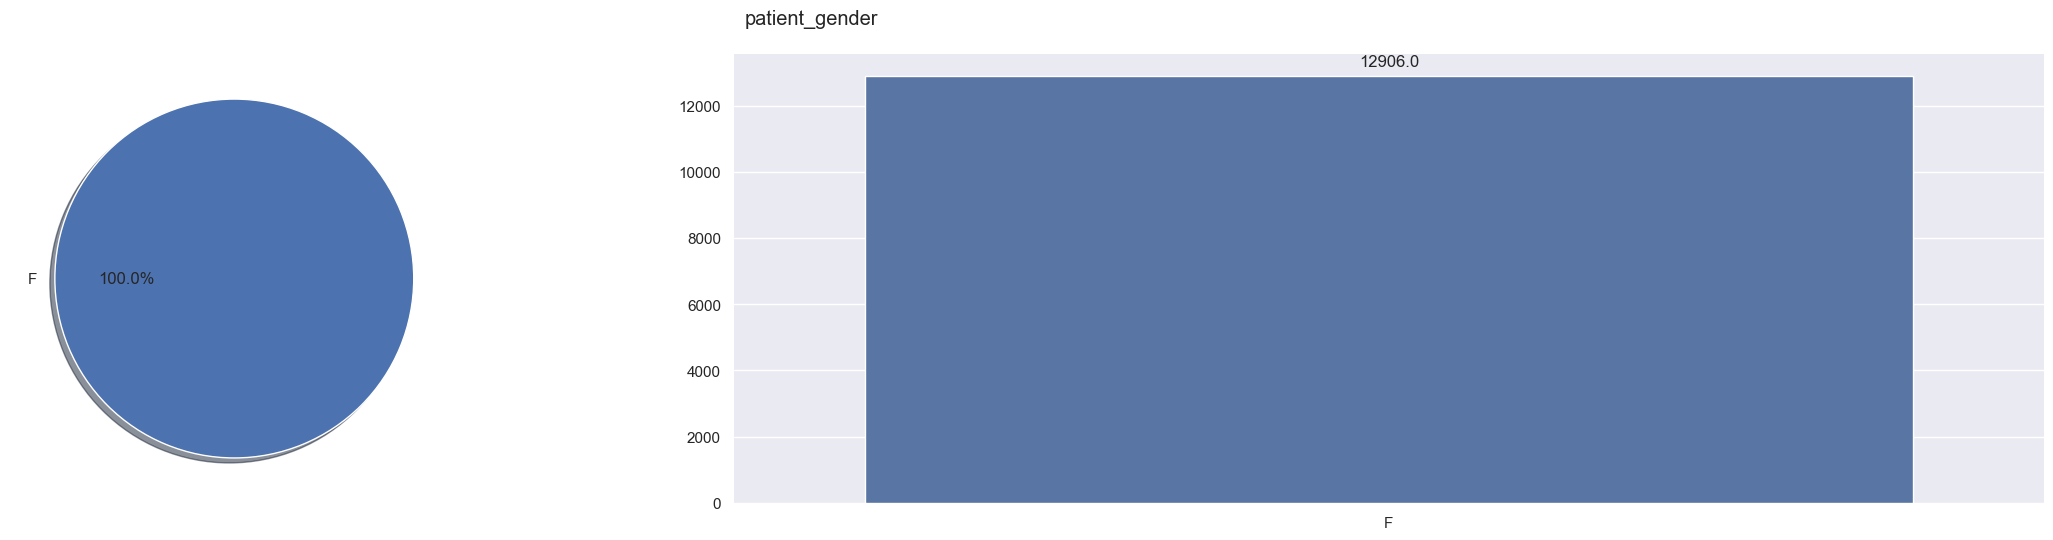

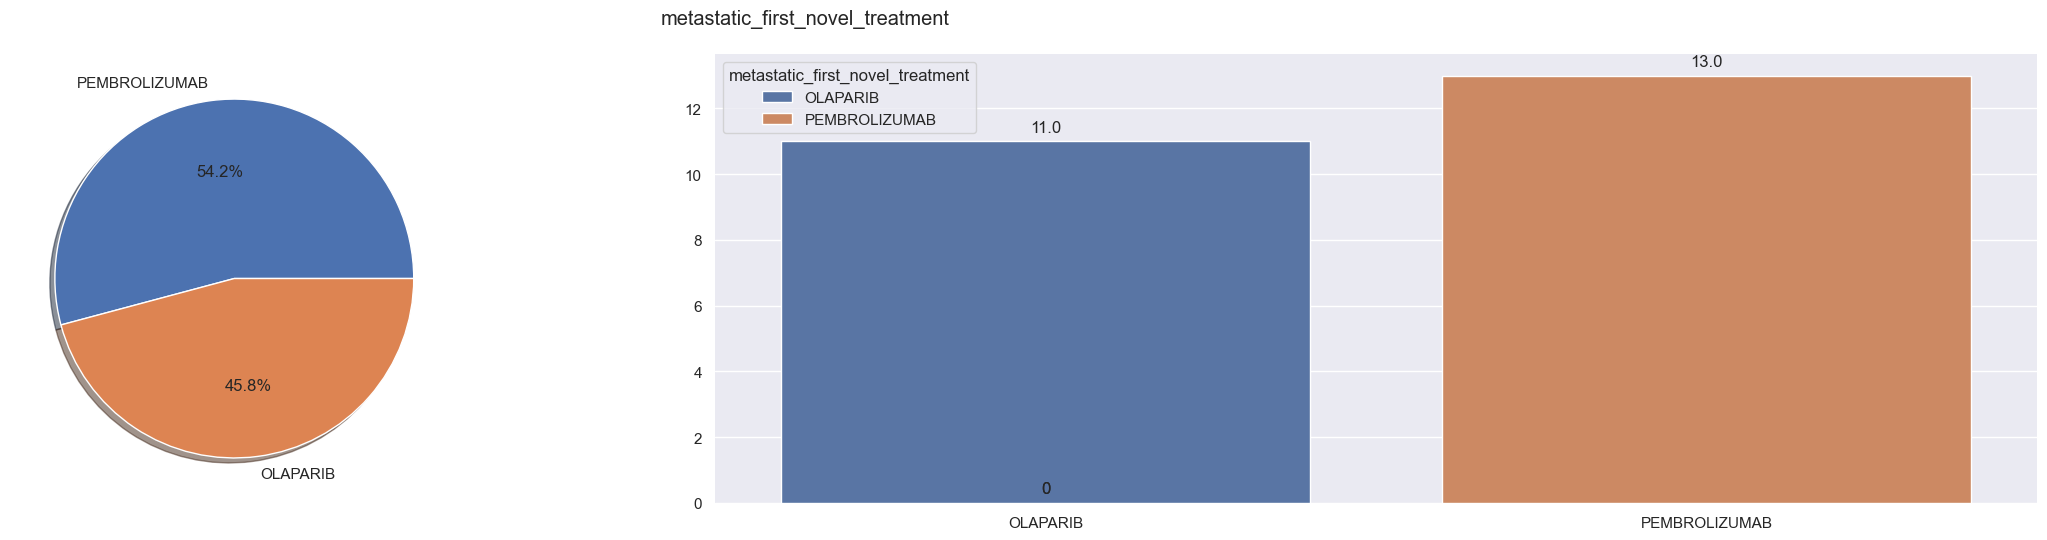

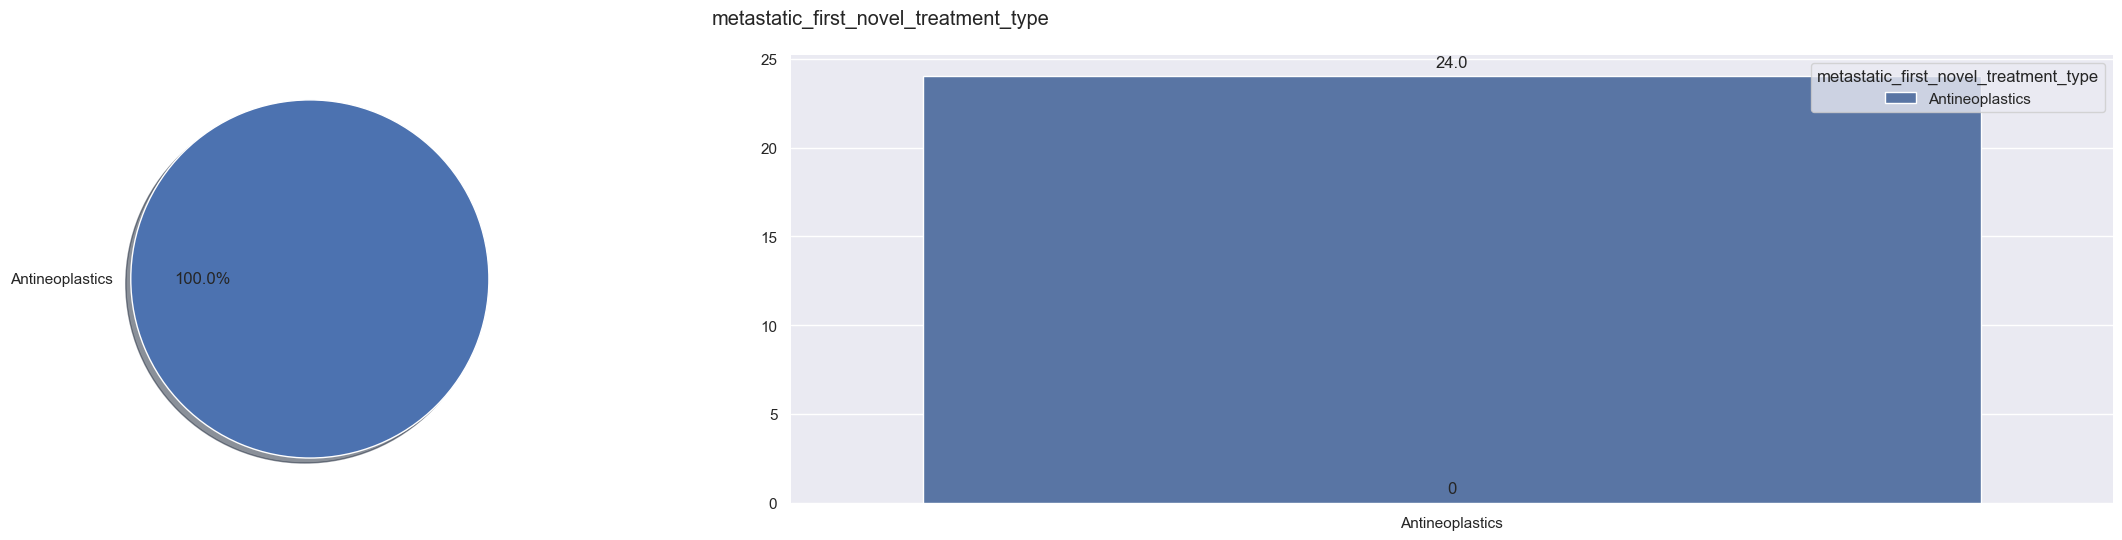

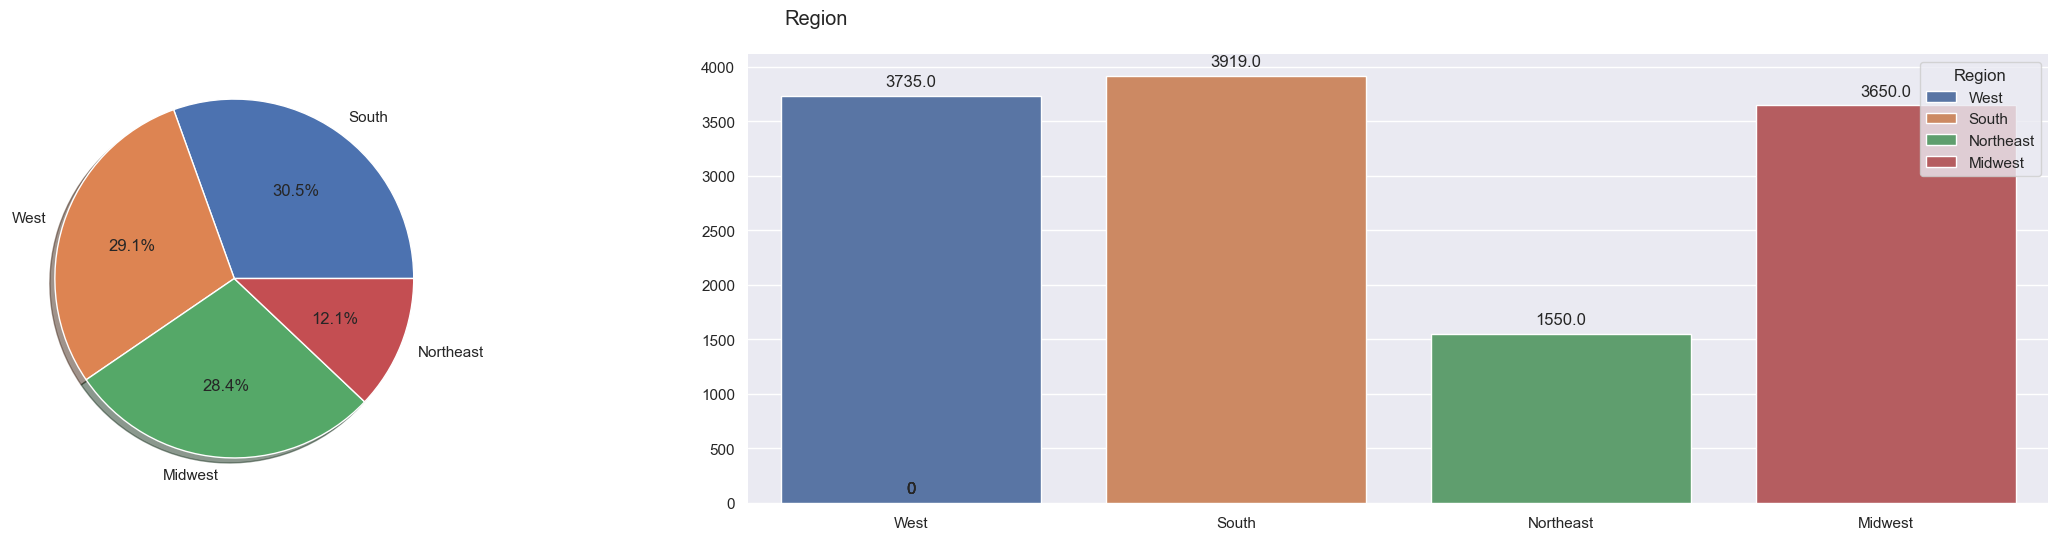

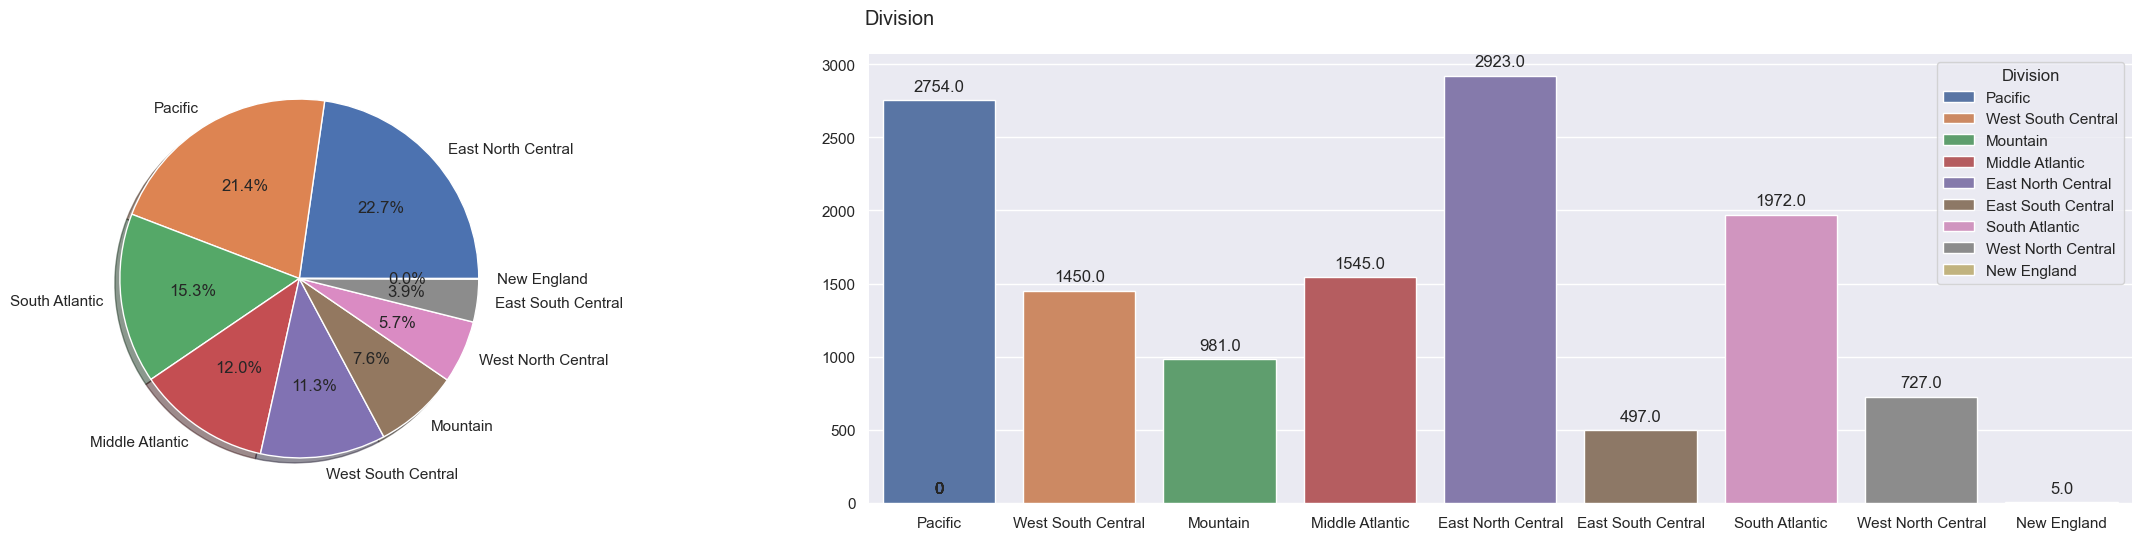

In [16]:
cat_columns = train.select_dtypes(include=['object']).drop(columns=['patient_state', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code'], axis=1)
sns.set(rc=plt.rcParams)
for column in cat_columns:
    f, ax = plt.subplots(1, 2, figsize=(25, 5.5))
    train[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')
    sns.countplot(x=column, data=train, ax=ax[1], hue=column)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    total = len(train[column])
    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.suptitle(f'{column}')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

In [17]:
#Dropping Target column & account id for numerical columns
num_columns = train.select_dtypes(include=['float64', 'int64']).drop(columns=['patient_id'])
# Check Negative values
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


In [76]:
#Non -digit entries in Numeric columns other than NAN 
non_digit_values = {}
for column in num_columns.columns:
    try:
        num_columns[column].astype(float)
    except ValueError:
        non_digit_values[column] = num_columns[~num_columns[column].str.replace('.', '', 1).str.isnumeric()][column]

print("Columns with non-digit entries:")
print(non_digit_values)

Columns with non-digit entries:
{}


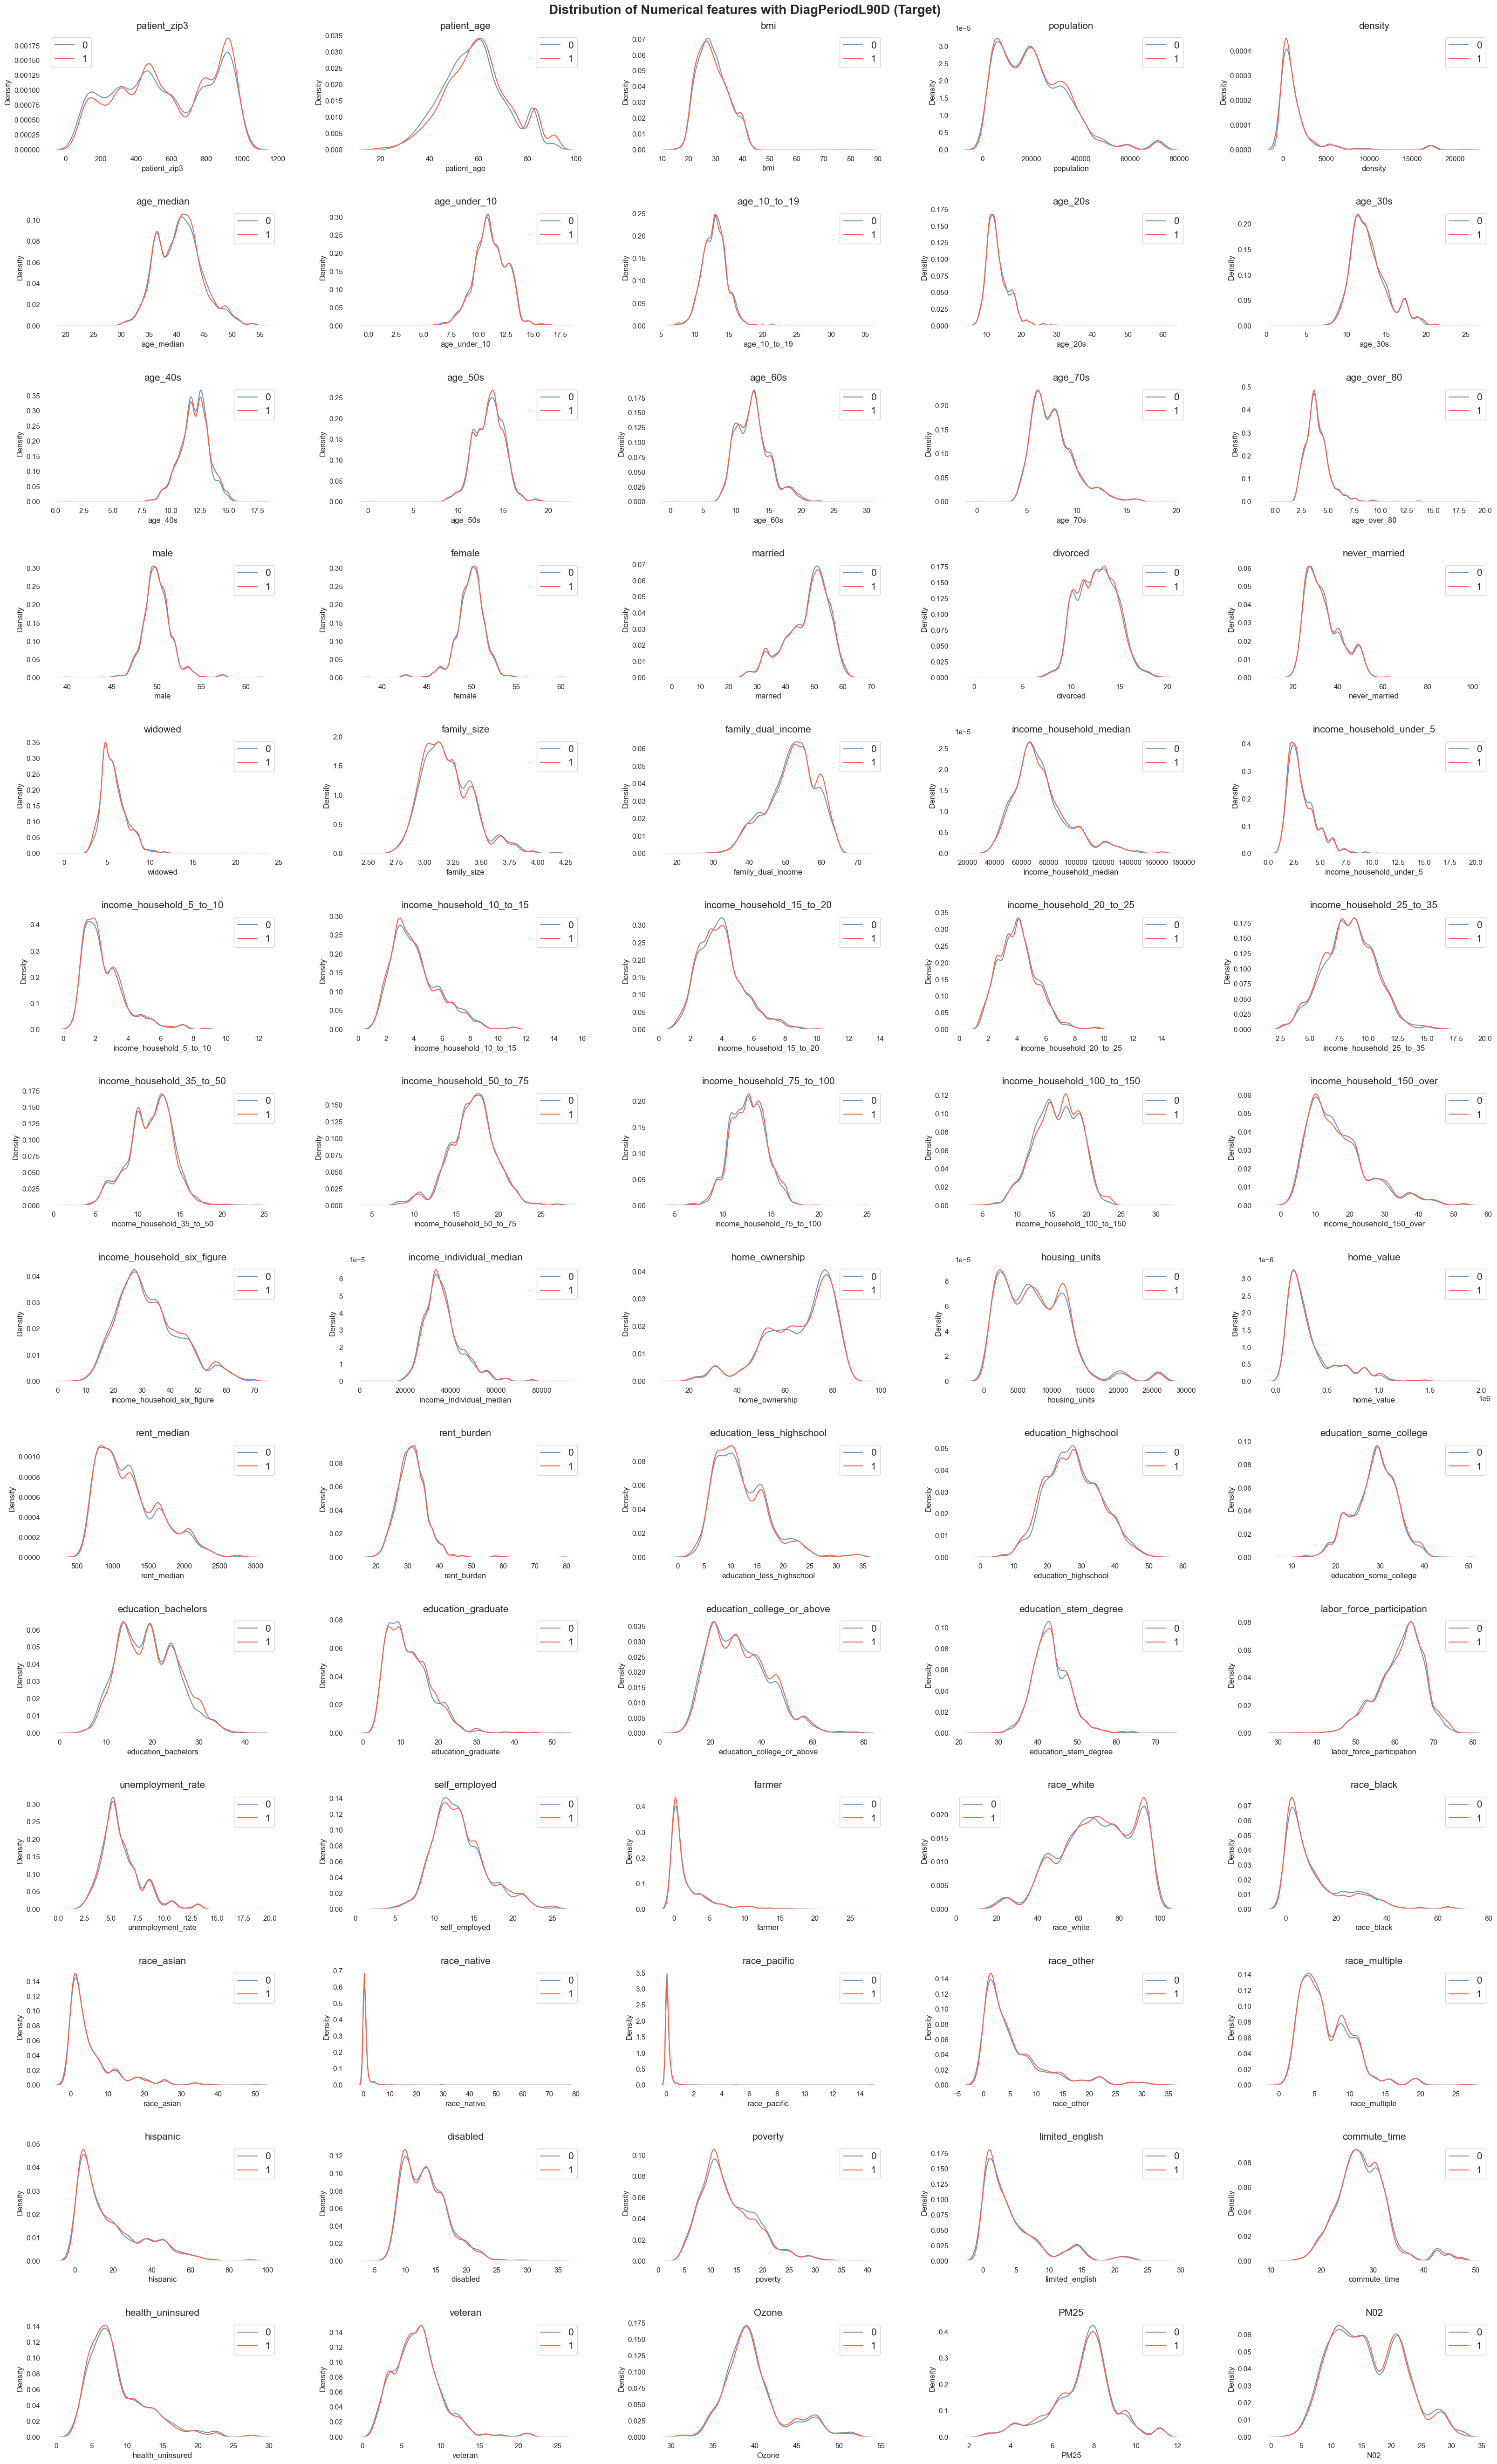

In [90]:
train['DiagPeriodL90D'] = train['DiagPeriodL90D'].astype(int)
train_num = train.select_dtypes(include=['number']).drop(columns=['patient_id','DiagPeriodL90D'], axis=1)
fig = plt.figure(figsize=[40, 60])

fig.suptitle('Distribution of Numerical features with DiagPeriodL90D (Target)', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axtitle_dict = {'fontsize': 15} 
for i, col in enumerate(train_num):
    ax = fig.add_subplot(14, 5, i+1)
    sns.kdeplot(train[train['DiagPeriodL90D'] == 0][col], color='#6d92bf', ax=ax,  label='0')
    sns.kdeplot(train[train['DiagPeriodL90D'] == 1][col], color='#f2634e', ax=ax,  label='1')    
    ax.set_title(col, fontdict=axtitle_dict)
    ax.legend(fontsize=15)
    ax.grid(False)
plt.show()

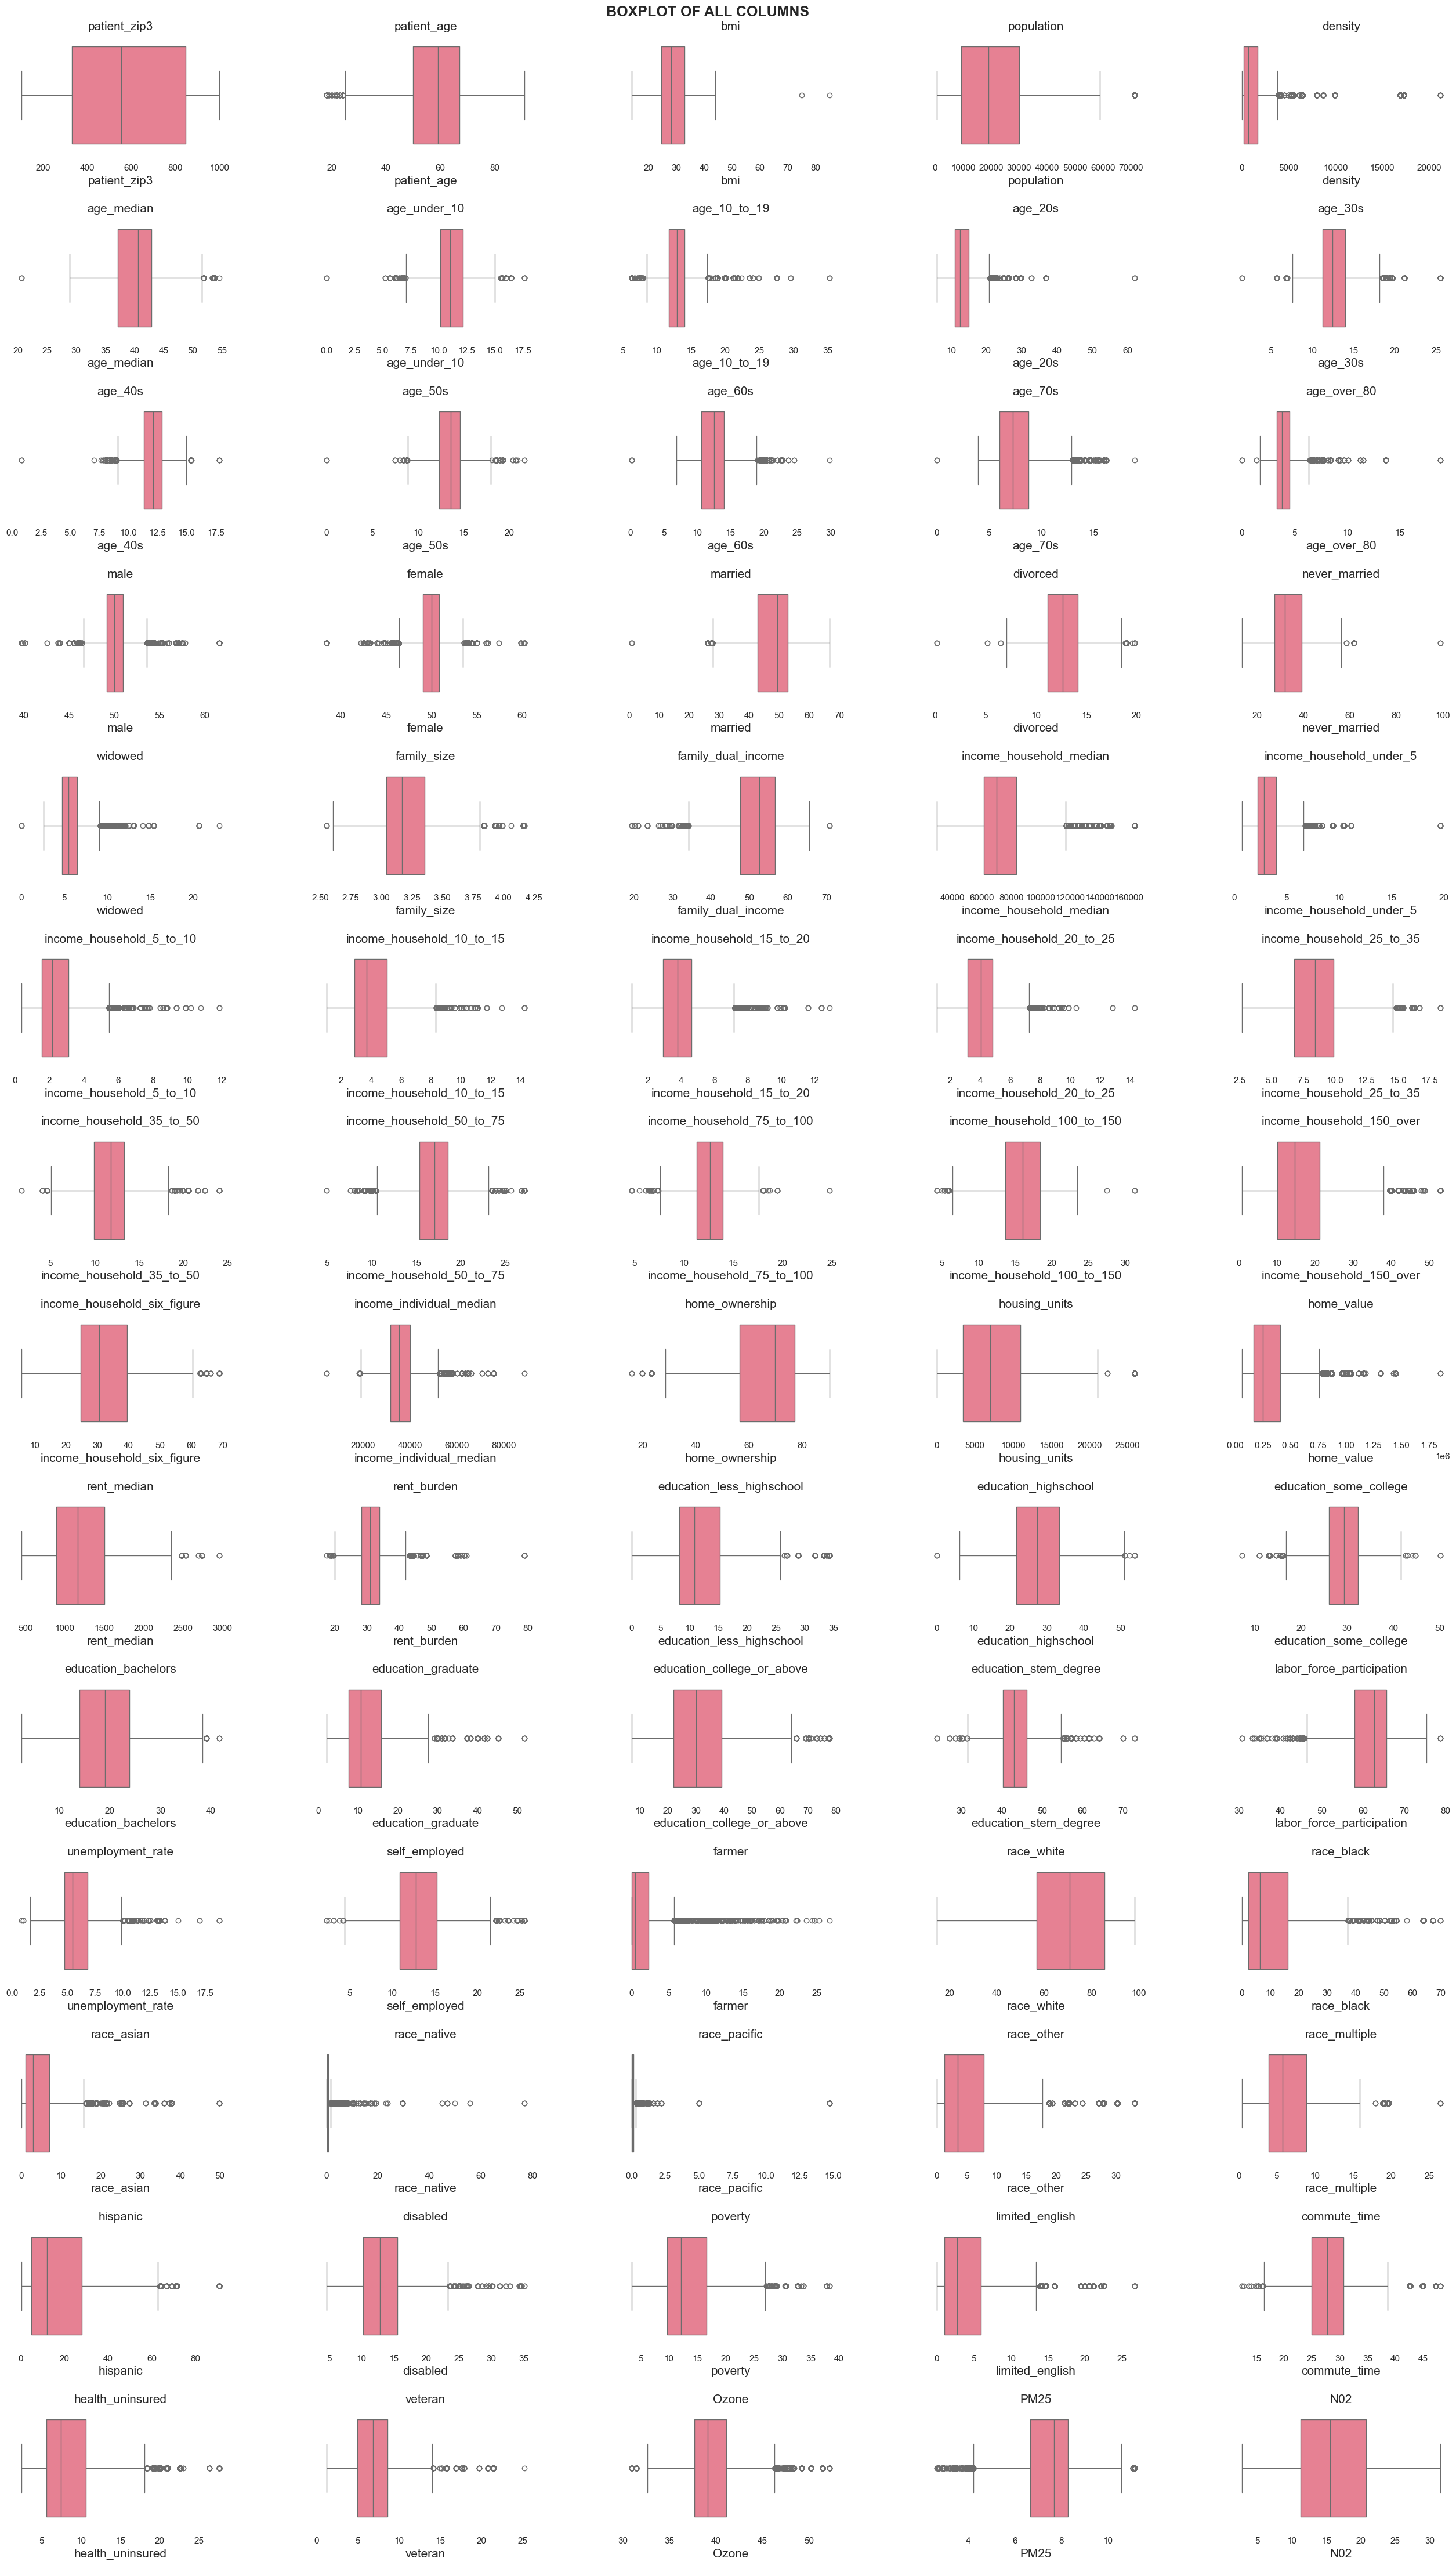

In [82]:
#Outliers in each Columns
axlab_dict = {'fontsize':15}
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,50])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i ,col in enumerate(train_num):
    ax = fig.add_subplot(14,5, i+1)
    ax = sns.boxplot(data = train, x=col ,palette="husl")
    ax.set_title(f'{col}', fontdict=axtitle_dict)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.grid(False)
plt.show()

In [ ]:
# payer type unknown
